In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [3]:
cancer_df = pd.read_csv("Resource/Added_final_combined_cancer_data.csv")
cancer_df.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Kentucky,521.0,26945.0,198.0,10206.0,38.0
1,Delaware,498.0,5803.0,170.0,1989.0,34.0
2,Pennsylvania,487.0,79060.0,169.0,28658.0,36.0
3,New Hampshire,484.0,8129.0,162.0,2718.0,33.0
4,New Jersey,483.0,50921.0,154.0,16407.0,32.0


In [4]:
cancer_df = cancer_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
cancer_df.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
44,Utah,403.0,10143.0,127.0,3021.0,30.0
4,New Jersey,483.0,50921.0,154.0,16407.0,32.0
5,New York,483.0,111527.0,151.0,35491.0,32.0
11,Connecticut,472.0,20843.0,146.0,6657.0,32.0
3,New Hampshire,484.0,8129.0,162.0,2718.0,33.0


In [5]:
bottom = cancer_df.tail(20)
bottom.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
24,South Dakota,456.0,4514.0,160.0,1648.0,37.0
39,Oregon,430.0,20790.0,163.0,7933.0,38.0
40,Virginia,419.0,39078.0,161.0,14686.0,38.0
35,Michigan,450.0,54047.0,170.0,20727.0,38.0
38,District of Columbia,433.0,2818.0,169.0,1082.0,38.0


In [6]:
cancer_df = cancer_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=False)
cancer_df.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
8,West Virginia,476.0,11653.0,189.0,4756.0,41.0
12,Mississippi,469.0,15923.0,194.0,6522.0,41.0
28,Oklahoma,453.0,19837.0,184.0,8082.0,41.0
30,Alabama,452.0,26110.0,179.0,10332.0,40.0
47,Nevada,393.0,12409.0,162.0,4934.0,40.0


In [7]:
top = cancer_df.head(10)
top

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
8,West Virginia,476.0,11653.0,189.0,4756.0,41.0
12,Mississippi,469.0,15923.0,194.0,6522.0,41.0
28,Oklahoma,453.0,19837.0,184.0,8082.0,41.0
30,Alabama,452.0,26110.0,179.0,10332.0,40.0
47,Nevada,393.0,12409.0,162.0,4934.0,40.0
13,Arkansas,468.0,16551.0,185.0,6623.0,40.0
20,Tennessee,463.0,35692.0,184.0,14111.0,40.0
49,New Mexico,374.0,9116.0,144.0,3514.0,39.0
21,Ohio,462.0,64858.0,177.0,25317.0,39.0
23,Indiana,457.0,34242.0,178.0,13416.0,39.0


In [10]:
income_df = pd.read_csv("State income.csv")
income_df.head()

,Unnamed: 0,Population,Household Income,State
0,0,20612439.0,50860.0,Florida
1,1,10310371.0,53559.0,Georgia
2,2,1428557.0,74511.0,Hawaii
3,3,1683140.0,51807.0,Idaho
4,4,12801539.0,60960.0,Illinois


In [13]:
top_income =pd.merge(income_df, top, on="State", how="left").dropna()
top_income
#top_income.to_csv("top income.csv", sep=",")

,Unnamed: 0,Population,Household Income,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
5,5,6633053.0,52314.0,Indiana,457.0,34242.0,178.0,13416.0,39.0
15,15,2988726.0,41754.0,Mississippi,469.0,15923.0,194.0,6522.0,41.0
19,19,2940058.0,55180.0,Nevada,393.0,12409.0,162.0,4934.0,40.0
22,22,2081015.0,46748.0,New Mexico,374.0,9116.0,144.0,3514.0,39.0
26,26,11614373.0,52334.0,Ohio,462.0,64858.0,177.0,25317.0,39.0
27,27,3923561.0,49176.0,Oklahoma,453.0,19837.0,184.0,8082.0,41.0
33,33,6651194.0,48547.0,Tennessee,463.0,35692.0,184.0,14111.0,40.0
39,39,1831102.0,43385.0,West Virginia,476.0,11653.0,189.0,4756.0,41.0
43,43,4863300.0,46257.0,Alabama,452.0,26110.0,179.0,10332.0,40.0
46,46,2988248.0,44334.0,Arkansas,468.0,16551.0,185.0,6623.0,40.0


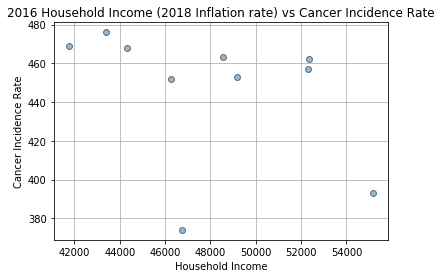

The r-squared is: -0.39451651308398167


In [25]:
top_household_income = top_income["Household Income"]
top_incidence_rate = top_income["Incidence Rate"]
top_death = top_income["Death Rate"]
top_cancer_hundred = top_income["Cancer Death_per_hundred_cancer_patient"]

#Scatterplot 
plt.scatter(top_household_income, top_incidence_rate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Incidence Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Incidence Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_incidence_rate)
tempregress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
#plt.annotate(templine_eq, (6,10), fontsize=15, color ="red")

plt.savefig("income_vs_cancerincidence.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")

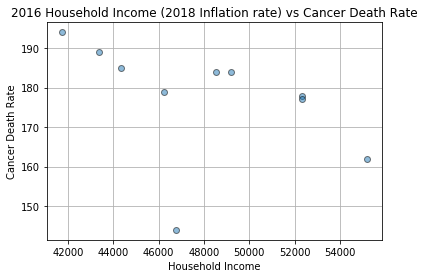

The r-squared is: -0.4301499456209455


In [28]:
plt.scatter(top_household_income, top_death, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_death)
tempregress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))

plt.savefig("income_vs_cancerdeath.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")

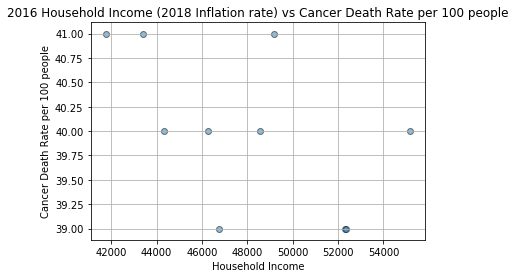

The r-squared is: -0.5364314455830903


In [30]:
plt.scatter(top_household_income, top_cancer_hundred, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate per 100 people")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate per 100 people")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_cancer_hundred)
tempregress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))

plt.savefig("income_vs_cancerdeathhundred.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")

In [14]:
bottom_income = pd.merge(income_df, bottom, on="State", how="left").dropna()
bottom_income
#bottom_income.to_csv("bottom income.csv", sep=",")

,Unnamed: 0,Population,Household Income,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
5,5,6633053.0,52314.0,Indiana,457.0,34242.0,178.0,13416.0,39.0
8,8,4436974.0,46659.0,Kentucky,521.0,26945.0,198.0,10206.0,38.0
9,9,4681666.0,45146.0,Louisiana,481.0,24888.0,183.0,9346.0,38.0
10,10,1331479.0,53079.0,Maine,476.0,8700.0,174.0,3267.0,38.0
13,13,9928300.0,52492.0,Michigan,450.0,54047.0,170.0,20727.0,38.0
15,15,2988726.0,41754.0,Mississippi,469.0,15923.0,194.0,6522.0,41.0
16,16,6093000.0,51746.0,Missouri,455.0,32947.0,176.0,12920.0,39.0
19,19,2940058.0,55180.0,Nevada,393.0,12409.0,162.0,4934.0,40.0
22,22,2081015.0,46748.0,New Mexico,374.0,9116.0,144.0,3514.0,39.0
26,26,11614373.0,52334.0,Ohio,462.0,64858.0,177.0,25317.0,39.0


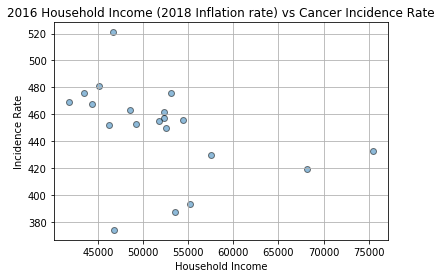

The r-squared is: -0.3819473145457604


In [31]:
bottom_household_income = bottom_income["Household Income"]
bottom_incidencerate = bottom_income["Incidence Rate"]
bottom_deathrate = bottom_income["Death Rate"]
bottom_hundred = bottom_income["Cancer Death_per_hundred_cancer_patient"]

plt.scatter(bottom_household_income, bottom_incidencerate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Incidence Rate")
plt.xlabel("Household Income")
plt.ylabel("Incidence Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_incidencerate)
tempregress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))

plt.savefig("bottom_income_vs_bottom_incidencerate.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")

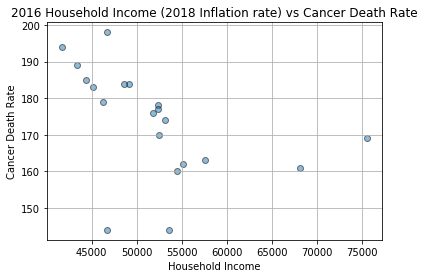

The r-squared is: -0.4611936316398809


In [33]:
plt.scatter(bottom_household_income, bottom_deathrate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_deathrate)
tempregress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))

plt.savefig("bottom_income_vs_bottom_deathrate.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")

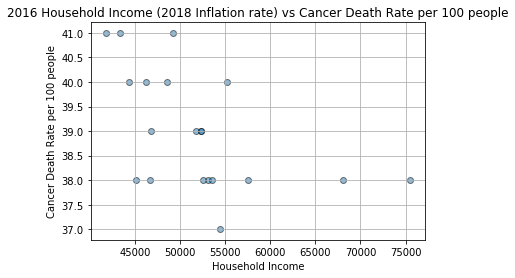

The r-squared is: -0.522776693250408


In [34]:
plt.scatter(bottom_household_income, bottom_hundred, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate per 100 people")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate per 100 people")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_hundred)
tempregress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))

plt.savefig("bottom_income_vs_bottom_hundred.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")